# Field test del MultiLayer Perceptron

Questo è il testo dell'esercitazione che dovrete completare per questa settimana. Non sarà guidato passo passo, ma
dovrete usare quello che avete imparato negli altri jupyter notebooks per addestrare dei modelli e cross-validarli,
al massimo delle vostre capacità.
I tre esercizi da svolgere sono:

1. addestrare un MLP su [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist). Potete utilizzare il codice
 del precedente notebook, ma vi consiglio di riscriverlo in maniera più ordinata. In questo caso, fate prima
 un'analisi dei dati per capire con cosa avete a che fare.
2. addestrare un MLP su [YearPredictionMSD](https://archive.ics.uci.edu/ml/datasets/YearPredictionMSD): l'idea di
      questo esercizio è quella di utilizzare una rete neurale per migliorare le performance rispetto alla soluzione
      che avete già implementato con la logistic regression nell'[esercitazione 6](https://github.com/Sapienza-AI-Lab/esercitazione6-22-23). In questo caso l'aspetto che ci
      preme esplorare è l'efficacia del MLP nell'imparare una rappresentazione (i.e. delle features) migliore per la
      classifcazione, o la regressione. Questo esercizion non è banale e sono interessato a vedere come sfrutterete
      le reti neurali per migliorare le prestazioni. Se non avete fatto l'EDA durante la scorsa esercitazione, questo
       è il momento di farla.
3. addestrare un MLP su CIFAR-10: riprenderemo questo dataset anche con le reti convoluzionali, ma iniziamo a
      farci un'idea delle sue caratterisitche addestrando im modello migliore possibile utilizzando un MLP. La sfida
      in questo caso sarà la dimensionalità dell'input, e quindi delle connessioni del MLP.


In tutti i casi tenete conto di questi aspetti:
* Non siete costretti ad usare i notebook. Personalmente non li amo, ma sono adatti a presentare il codice per la
    didattica. Per lavorare con progetti di una certa complessità è spesso meglio passare ad un normale progetto
    python. Ovviamente se non avete una GPU nel vostro portatile/desktop, l'unica soluzione è colab.
* Utilizzate tensorboard o weight and biases per la visualizzazione e per fare il debug del vostro modello. Non provate le cose a caso.

#---------------------------------------------------------------------------------------------------------------------------------------------
#1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline

# tutte le import
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, SubsetRandomSampler, ConcatDataset
from torchvision import datasets, transforms
from torchvision.datasets import FashionMNIST
import torchvision
import sklearn
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import torch.optim as optim
import numpy as np



#if torch.cuda.is_available():
 #   device = torch.device('cuda')
#else:
device = torch.device('cpu')

print('Using PyTorch version:', torch.__version__, ' Device:', device)

Using PyTorch version: 2.0.1+cu118  Device: cpu


In [ ]:

transform = transforms.Compose([
    transforms.ToTensor(), #img a tensore
    transforms.Normalize(0, 1) #norm media 0 deviazione 1
])

trainset = torchvision.datasets.FashionMNIST( #trainset usando torchvision, è piu ez
    root='./data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(trainset, batch_size=64, shuffle=True) # dataloader

validationset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)
validation_loader = DataLoader(trainset, batch_size=64, shuffle=True) 

testset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)
test_loader = DataLoader(trainset, batch_size=64, shuffle=True) 


100%|██████████| 26421880/26421880 [00:00<00:00, 116727210.17it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 8754323.07it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw




100%|██████████| 4422102/4422102 [00:00<00:00, 64543389.14it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5622988.80it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


In [ ]:
dataiter = iter(train_loader) #creo iteratore
images, labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)
print(images)

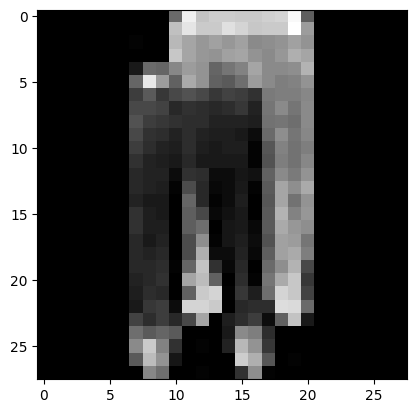

In [ ]:
#stampo img come su intro es7
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [ ]:

def activation(x):
    activ = F.relu(x) 
    return activ

# appiattisco a 1 dimensione vettore le img 
inputs = images.view(images.shape[0], -1) # images.shape[0]=num tot img in tensore
#metto i parametri
input_size = inputs.shape[1] #input layer 0
hidden_size = 256  #hidden layer 1
output_size = 10 #output layer 2

# definisco pesi e bias random
w1 = torch.randn(input_size, hidden_size) #layer 1
b1 = torch.randn(hidden_size)
w2 = torch.randn(hidden_size, output_size)#layer 2
b2 = torch.randn(output_size)

# relu a layer1 (hidden layer)
h = activation(torch.mm(inputs, w1) + b1)
# uotput layer 2 (no relu)
out = torch.mm(h, w2) + b2

#print(out.shape)



torch.Size([64, 10])
torch.Size([64, 10])
tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])


In [ ]:
def softmax(x):
    exp_x=torch.exp(x)
    exp_sum=torch.sum(exp_x,dim=1,keepdim=True) #mantiene dim tensore
    softmax=exp_x/exp_sum #formula softmax
    return softmax


probabilities = softmax(out) # output finale è la prob per cui l input appartiene a una delle classi dei neuroni in layer 2 (se classificatore)

#dim 64,10 
print(probabilities.shape)
# somma tot=1
print(probabilities.sum(dim=1))

In [ ]:
import torch.nn.init as init
#definisco la rete neurale multilayerperception

class MLP(nn.Module):
    def __init__(self,input_size = 784, output_size = 10, layers=[128,64,32]):
        super(MLP, self).__init__()
         #definisco i layer della rete
        self.input_size = input_size
        self.output_size = output_size 
        self.layers = layers #hidden layer
        self.fc1 = nn.ModuleList() #ci metto i moduli linear dentro
        #input
        self.fc1.append(nn.Linear(input_size, layers[0]))
        #ciclo sui hidden layers
        for i in range(1, len(layers)):
            self.fc1.append(nn.Linear(layers[i-1], layers[i]))
        #output
        self.fc1.append(nn.Linear(layers[-1], output_size))

#definisco forward pass
    def forward(self, x):
        for layer in self.fc1[:-1]:
            x = F.relu(layer(x)) #relu so ogni hidden layer
        x = self.fc1[-1](x) #applico ultimo modulo(outo+put)
        return F.log_softmax(x, dim=1) #applico softmax alla fine


reg_coeff = 0.001 #per evitare overfitting
model = MLP().to(device) #uso gpu o no

In [ ]:
#uso optimizer sgd
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) #learning rate
criterion = nn.CrossEntropyLoss() #funzione loss
print(model)



In [ ]:

# funzioni per visualizzare img da tensore, ce da esercitaizone7
def imshow(image, ax=None, title=None, normalize=True):

    if ax is None: #asse
        fig, ax = plt.subplots()#inverto dim tensore a h,w,c
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
       
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225]) #deviazione
        image = std * image + mean #normalizzo per media=0  dev=1
        image = np.clip(image, 0, 1)#valori pixel 0-1

    ax.imshow(image) #roba estetica
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


def view_recon(img, recon):
    #Function for displaying an image (as a PyTorch Tensor) and its
    #  reconstruction also a PyTorch Tensor

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

def view_classify(img, ps, version="Fashion"):
    # Function for viewing an image and it's predicted classes
    ps = ps.data.numpy().squeeze()
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

MLP(
  (fc1): ModuleList(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Linear(in_features=128, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): Linear(in_features=32, out_features=10, bias=True)
  )
)


<Axes: >

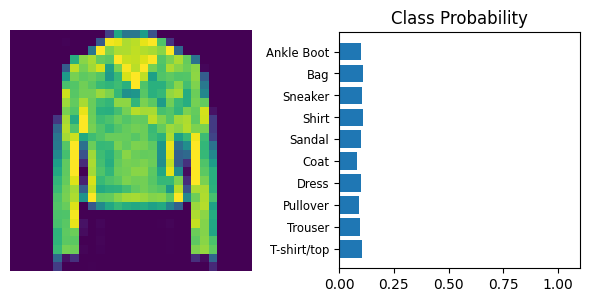

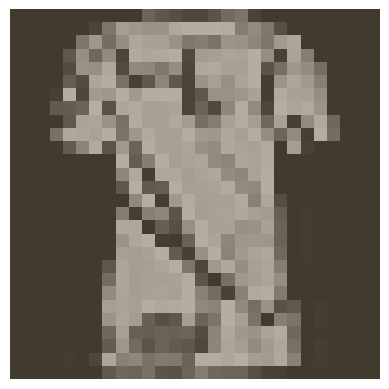

In [ ]:
#provo a passare un img per fare fast forward
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.to(device) #gpu
labels = labels.to(device)

# img diventa vettore 1d (batch size, color channels, image pixels)
images.resize_(64, 1, 784)

#forward pass
img_idx = 0
ps = model.forward(images[img_idx,:]) 
img = images[img_idx]
view_classify(img.cpu(), softmax(ps).cpu()) #visualizza risultato
print(ps)


In [ ]:
img_idx = int(np.random.randint(64))
img = images[img_idx]
imshow(img.cpu().view(1, 28, 28))

In [ ]:
train_loss=[]
train_acc=[]
#addestra rete
def train(epoch, log_interval=200):
    
  #  model.eval()
    t_loss, correct = 0, 0 #usate per calcolare errore e correttezza durante addestram.
    #modalita train del modello 
    model.train()
    #loop sui batch del training set
    for batch_idx, (data, target) in enumerate(train_loader):
        #copia su gpu se usato
        data, target = data.to(device), target.to(device)
         #per adattare tensore al formato input
        batch_size=data.size(0) #num campioni
        data=data.view(batch_size,-1)
        #azzera i gradienti prima di backprop
        optimizer.zero_grad()
        # forward pass
        output = model(data)
        #calcolo loss
        loss = criterion(output, target)

        reg_loss = 0.0 #si usa per evitare overfitting
        for param in model.parameters():
            reg_loss += torch.norm(param, p=2) #norma dei parametri

        total_loss = loss + reg_coeff * reg_loss

        # backpropagation con loss regolarizzato, lo fa solo nel train
        total_loss.backward()

        optimizer.step() #ottimizza pesi, solo nel train

        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data.item()))


        #sommo le perdite e le accuracy
        t_loss += total_loss.item()
        correct += (output.argmax(dim=1, keepdim=True)==target.view(-1,1)).sum().item()


    
    t_loss /= len(validation_loader) #medio
    accuracy = 100.0 * correct / len(validation_loader.dataset) #percentuale
    train_loss.append(t_loss) #aggiungo nei vettori sopra
    train_acc.append(accuracy)



In [ ]:
def validate(loss_vector, accuracy_vector):
    #modalita validazione
    model.eval()
    val_loss, correct = 0, 0
  
    with torch.no_grad():# Deactivate gradients for the following code 
        for data, target in validation_loader:
           
            data, target = data.to(device), target.to(device)#gpu
            data = data.view(data.size(0), -1)# ridimensiona
            output = model(data) #forward pass
            val_loss += criterion(output, target).item()#loss sommato skippa pasi
            pred = output.argmax(dim=1, keepdim=True)# sono le label predette finali
            correct += pred.eq(target.view_as(pred)).sum().item()#sono quelle giuste

    val_loss /= len(validation_loader)
    accuracy = 100.0 * correct / len(validation_loader.dataset)
    loss_vector.append(val_loss)
    accuracy_vector.append(accuracy)

    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        val_loss, correct, len(validation_loader.dataset), accuracy))

In [ ]:
%%time
# numero epoche
epochs = 10

lossv, accv = [], []
# per ogni epoca
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.287093
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.095731
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.371453
Train Epoch: 1 [38400/60000 (64%)]	Loss: 1.015171
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.815859

Validation set: Average loss: 0.7253, Accuracy: 43674/60000 (73%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.725393
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.664566
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.609055
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.617019
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.489190

Validation set: Average loss: 0.5672, Accuracy: 47488/60000 (79%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.725066
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.449186
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.526670
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.534834
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.665340

Validation set: Average loss: 0.5201, Accuracy: 48653/60000 (81%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.682422
Train Epoch: 4 [

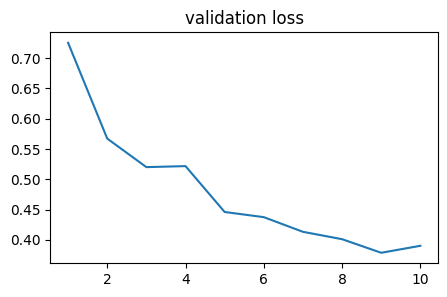

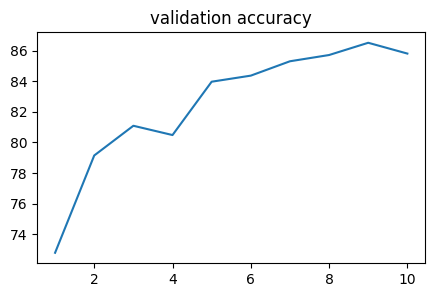

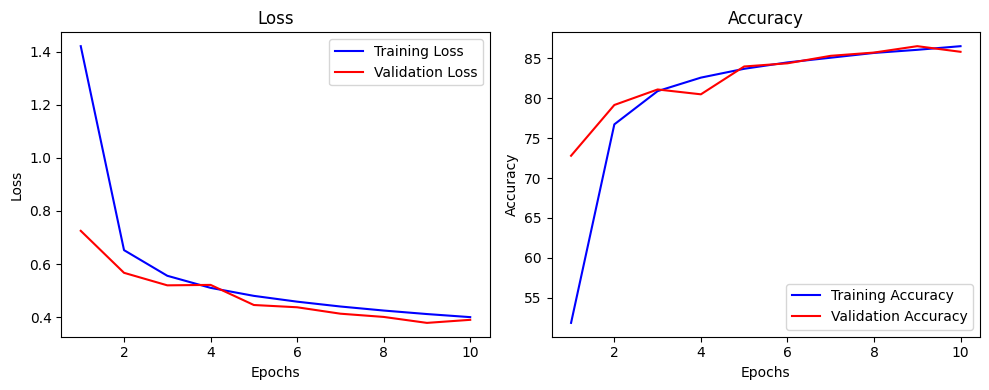

In [ ]:

plt.figure(figsize=(5,3))
plt.plot(np.arange(1,epochs+1), lossv)
plt.title('val loss')
plt.figure(figsize=(5,3))
plt.plot(np.arange(1,epochs+1), accv)
plt.title('val accuracy');

epochs = range(1, len(lossv) + 1)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Train Loss')
plt.plot(epochs, lossv, 'r', label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b', label='Train Accuracy')
plt.plot(epochs, accv, 'r', label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()



plt.tight_layout()
plt.show()




#---------------------------------------------------------------------------------------------------------------------------------------------
#2

In [15]:
import torch
from sklearn.model_selection import train_test_split

# carico dataset YearPredictionMSD
dataset = pd.read_csv('/content/drive/MyDrive/Ese_IAGI/Es6/YearPredictionMSD.txt', sep=",")



# divido dataset in set di addestramento e test
train_data, test_data, train_labels, test_labels = train_test_split(
    dataset.iloc[:, :-1],
    dataset.iloc[:, -1],
    test_size=0.2,
    random_state=42
)

# divido set di addestramento in set di addestramento e convalida
train_data, validation_data, train_labels, validation_labels = train_test_split(
    train_data, train_labels,
    test_size=0.5,
    random_state=42
)


# converto i dati nel tensore del tipo corretto
train_data = torch.tensor(train_data.values, dtype=torch.float32)
train_labels = torch.tensor(train_labels.values, dtype=torch.float32)
validation_data = torch.tensor(validation_data.values, dtype=torch.float32)
validation_labels = torch.tensor(validation_labels.values, dtype=torch.float32)
test_data = torch.tensor(test_data.values, dtype=torch.long)
test_labels = torch.tensor(test_labels.values, dtype=torch.float32)

# percorso file
train_data_path = '/content/train_data.pt'
train_labels_path = '/content/train_labels.pt'
validation_data_path = '/content/validation_data.pt'
validation_labels_path = '/content/validation_labels.pt'
test_data_path = '/content/test_data.pt'
test_labels_path = '/content/test_labels.pt'

# salvo tutto in file
torch.save(train_data, train_data_path)
torch.save(train_labels, train_labels_path)
torch.save(validation_data, validation_data_path)
torch.save(validation_labels, validation_labels_path)
torch.save(test_data, test_data_path)
torch.save(test_labels, test_labels_path)


In [16]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# dataloader del training
trainset = TensorDataset(train_data, train_labels)
batch_size = 64
shuffle = True
train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=shuffle)

# dataloader del validation
validationset = TensorDataset(validation_data, validation_labels)
validation_loader = DataLoader(validationset, batch_size=batch_size, shuffle=shuffle)

# dataloader del testing
testset = TensorDataset(test_data, test_labels)
test_loader = DataLoader(testset, batch_size=batch_size, shuffle=shuffle)

# EDA (exploratory data analysis)
print(dataset.head())  # prime righe del dataset
print(dataset.info())  # info
print(dataset.describe())  # descrizione statistica
#sns.pairplot(dataset)
#plt.show()

   2001  49.94357  21.47114  73.07750   8.74861  -17.40628  -13.09905  \
0  2001  48.73215  18.42930  70.32679  12.94636  -10.32437  -24.83777   
1  2001  50.95714  31.85602  55.81851  13.41693   -6.57898  -18.54940   
2  2001  48.24750  -1.89837  36.29772   2.58776    0.97170  -26.21683   
3  2001  50.97020  42.20998  67.09964   8.46791  -15.85279  -16.81409   
4  2001  50.54767   0.31568  92.35066  22.38696  -25.51870  -19.04928   

   -25.01202  -12.23257   7.83089  ...  13.01620  -54.40548  58.99367  \
0    8.76630   -0.92019  18.76548  ...   5.66812  -19.68073  33.04964   
1   -3.27872   -2.35035  16.07017  ...   3.03800   26.05866 -50.92779   
2    5.05097  -10.34124   3.55005  ...  34.57337 -171.70734 -16.96705   
3  -12.48207   -9.37636  12.63699  ...   9.92661  -55.95724  64.92712   
4   20.67345   -5.19943   3.63566  ...   6.59753  -50.69577  26.02574   

   15.37344   1.11144  -23.08793   68.40795  -1.82223  -27.46348   2.26327  
0  42.87836  -9.90378  -32.22788   70.49388  

In [17]:
def activation(x):
    # attivazione con la RELU
    return F.relu(x)

# converto dati nel tipo di tensore corretto
train_data = torch.tensor(train_data, dtype=torch.float32)
train_labels = torch.tensor(train_labels, dtype=torch.float32)

# creo parametri dei pesi w1,w2 e bias b1,b2
input_size = train_data.shape[1] # num neuroni input
hidden_size = 256 # num neuroni hidden
output_size = 10 # num neuroni output

w1 = torch.randn(input_size, hidden_size, dtype=torch.float32)
b1 = torch.randn(hidden_size, dtype=torch.float32)
w2 = torch.randn(hidden_size, output_size, dtype=torch.float32)
b2 = torch.randn(output_size, dtype=torch.float32)

# applico RELU a hidden
h = activation(torch.mm(train_data, w1) + b1)

# calcolo output
out = torch.mm(h, w2) + b2

print(out.shape)

def softmax(x):
    # applico softmax attivazione
    return torch.softmax(x, dim=1)

probabilities = softmax(out)

print(probabilities.shape)
# somma a 1
print(probabilities.sum(dim=1))

<ipython-input-17-b9e786f9dd93>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_data = torch.tensor(train_data, dtype=torch.float32)
<ipython-input-17-b9e786f9dd93>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels = torch.tensor(train_labels, dtype=torch.float32)


AOOOOOO
torch.Size([206137, 10])
torch.Size([206137, 10])
tensor([1., 1., 1.,  ..., 1., 1., 1.])


In [18]:
# lo tratto come problema di regressione
class MLPRegression(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MLPRegression, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 1)  # output singolo valore

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# errore MSE
criterion = nn.MSELoss()

# lo stavo trattando come classificazione
'''class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
'''
reg_coeff = 0.001

In [25]:
def train(epoch, log_interval=200):
    model.eval()
    t_loss, correct = 0, 0

    # training mode
    model.train()

    # ciclo sui batch del training set
    for batch_idx, (data, target) in enumerate(train_loader):
        # per la GPU
        data, target = data.to(device), target.to(device)

        # gradienti a 0, altrimenti me li potrebbe sommare e non va beneee
        optimizer.zero_grad()

        # ridimensiono per avere un vettore
        # adatto per la rete neurale
        # (primo asse= numero campioni)
        data = data.view(data.size(0), -1)

        # passo i dati alla rete
        output = model(data)

        # calcolo loss
        loss = criterion(output, target)

        # regolarizzo loss
        reg_loss = 0.0
        for param in model.parameters():
            reg_loss += torch.norm(param, p=2)

        total_loss = loss + reg_coeff * reg_loss

        # backpropagation
        total_loss.backward()

        # aggiorno pesi
        optimizer.step()

        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

        # loss
        t_loss += total_loss.item()

        # conto label predette
        pred = output.argmax(dim=1, keepdim=True)

        # conto label predette correttamente
        correct += pred.eq(target.view_as(pred)).sum().item()

    # loss medio
    t_loss /= len(train_loader)

    # accuratezza
    accuracy = 100.0 * correct / len(train_loader.dataset)

    # aggiungo i valori di loss e accuracy ai tensori corrispondenti
    train_loss.append(t_loss)
    train_acc.append(accuracy)


def validate(loss_vector, accuracy_vector):
    model.eval()
    val_loss, correct = 0, 0

    # disabilito calcolo gradienti
    with torch.no_grad():
        for data, target in validation_loader:
            # per la GPU
            data, target = data.to(device), target.to(device)

            # ridimensiono per avere un vettore
            # adatto per la rete neurale
            # (primo asse= numero campioni)
            data = data.view(data.size(0), -1)

            # passo i dati alla rete
            output = model(data)

            # calcolo loss
            val_loss += criterion(output, target).item()

            # label predette
            pred = output.argmax(dim=1, keepdim=True)

            # conto label predette correttamente
            correct += pred.eq(target.view_as(pred)).sum().item()

    # loss medio
    val_loss /= len(validation_loader)

    # accuratezza
    accuracy = 100.0 * correct / len(validation_loader.dataset)

    # aggiungo valori di loss e accuracy ai tensori corrispondenti
    loss_vector.append(val_loss)
    accuracy_vector.append(accuracy)

    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        val_loss, correct, len(validation_loader.dataset), accuracy))

In [26]:

# modello MLP regressione
model = MLPRegression(input_size, hidden_size)

# per la GPU
model.to(device)

# ottimizzatore e loss function
batch_size = 64
learning_rate = 0.001
num_epochs = 10
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

In [21]:
# addestro
train_loss = []
train_acc = []
for epoch in range(1, num_epochs + 1):
    train(epoch)
    validate(train_loss, train_acc)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Train Epoch: 1 [0/206137 (0%)]	Loss: 15212.047852
Train Epoch: 1 [12800/206137 (6%)]	Loss: 371.049744
Train Epoch: 1 [25600/206137 (12%)]	Loss: 403.375977
Train Epoch: 1 [38400/206137 (19%)]	Loss: 681.991943
Train Epoch: 1 [51200/206137 (25%)]	Loss: 309.218994
Train Epoch: 1 [64000/206137 (31%)]	Loss: 554.234192
Train Epoch: 1 [76800/206137 (37%)]	Loss: 1010.152710
Train Epoch: 1 [89600/206137 (43%)]	Loss: 554.295837
Train Epoch: 1 [102400/206137 (50%)]	Loss: 851.681519
Train Epoch: 1 [115200/206137 (56%)]	Loss: 456.477600
Train Epoch: 1 [128000/206137 (62%)]	Loss: 562.425354
Train Epoch: 1 [140800/206137 (68%)]	Loss: 395.377380
Train Epoch: 1 [153600/206137 (75%)]	Loss: 718.424561
Train Epoch: 1 [166400/206137 (81%)]	Loss: 284.490845
Train Epoch: 1 [179200/206137 (87%)]	Loss: 677.191345
Train Epoch: 1 [192000/206137 (93%)]	Loss: 728.994324
Train Epoch: 1 [204800/206137 (99%)]	Loss: 442.874573


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([57])) that is different to the input size (torch.Size([57, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([58])) that is different to the input size (torch.Size([58, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Validation set: Average loss: 494.2971, Accuracy: 0/206138 (0%)

Train Epoch: 2 [0/206137 (0%)]	Loss: 1068.743164
Train Epoch: 2 [12800/206137 (6%)]	Loss: 342.466522
Train Epoch: 2 [25600/206137 (12%)]	Loss: 284.410217
Train Epoch: 2 [38400/206137 (19%)]	Loss: 340.718018
Train Epoch: 2 [51200/206137 (25%)]	Loss: 522.096313
Train Epoch: 2 [64000/206137 (31%)]	Loss: 457.213593
Train Epoch: 2 [76800/206137 (37%)]	Loss: 295.897308
Train Epoch: 2 [89600/206137 (43%)]	Loss: 452.220001
Train Epoch: 2 [102400/206137 (50%)]	Loss: 472.389374
Train Epoch: 2 [115200/206137 (56%)]	Loss: 288.704437
Train Epoch: 2 [128000/206137 (62%)]	Loss: 336.753113
Train Epoch: 2 [140800/206137 (68%)]	Loss: 1116.983276
Train Epoch: 2 [153600/206137 (75%)]	Loss: 422.053986
Train Epoch: 2 [166400/206137 (81%)]	Loss: 987.302307
Train Epoch: 2 [179200/206137 (87%)]	Loss: 385.670288
Train Epoch: 2 [192000/206137 (93%)]	Loss: 489.708313
Train Epoch: 2 [204800/206137 (99%)]	Loss: 322.712372

Validation set: Average los

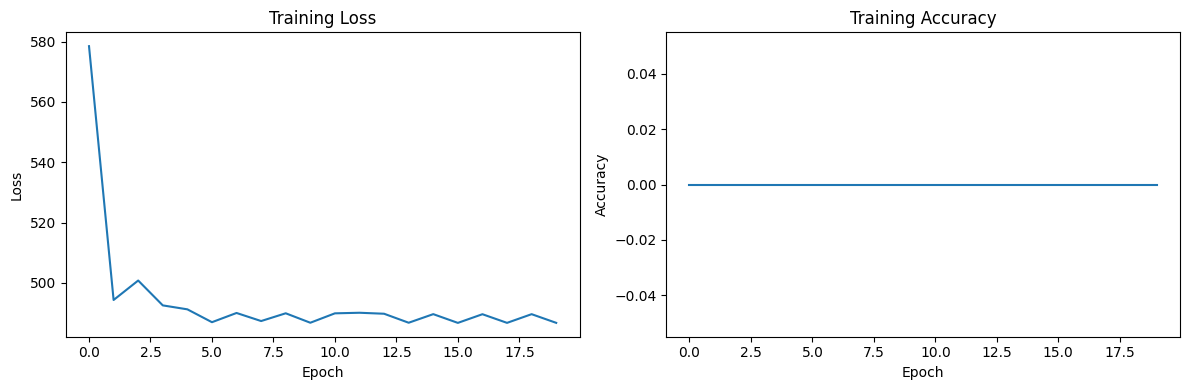

In [32]:
# grafici
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_acc)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

#---------------------------------------------------------------------------------------------------------------------------------------------
#3

In [34]:
import torchvision

In [35]:
# trasformo in tensori e normalizzo per avere media=0
transform = transforms.Compose([
    transforms.ToTensor(), transforms.Normalize(0.5, 0.5)
])

# carico training set
trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)
batch_size = 64
shuffle = True
train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=shuffle)



# carico validation set
validationset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)
batch_size = 64
shuffle = True
validation_loader = DataLoader(trainset, batch_size=batch_size, shuffle=shuffle) # create a data loader here



# carico test set
testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)
batch_size = 64
shuffle = True
test_loader = DataLoader(trainset, batch_size=batch_size, shuffle=shuffle)

# itero
dataiter = iter(train_loader)
images, labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)

100%|██████████| 170498071/170498071 [00:05<00:00, 29102400.37it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified
<class 'torch.Tensor'>
torch.Size([64, 3, 32, 32])
torch.Size([64])


In [36]:
def activation(x):
    # uso RELU come funzione di attivazione
    activ = F.relu(x)
    return activ

# rendo immagini tensori ad una dimensione
inputs = images.view(images.shape[0], -1)

# parametri dei pesi w1,w2 e bias b1,b2
input_size = inputs.shape[1]
hidden_size = 256
output_size = 10

w1 = torch.randn(input_size, hidden_size)
b1 = torch.randn(hidden_size)
w2 = torch.randn(hidden_size, output_size)
b2 = torch.randn(output_size)

# applico RELU a hidden layer
h = activation(torch.mm(inputs, w1) + b1)

# calcolo output
out = torch.mm(h, w2) + b2

print(out.shape)


def softmax(x):
    # calcolo funzione softmax
    softmax = torch.exp(x) / torch.sum(torch.exp(x), dim=1, keepdim=True)
    return softmax

probabilities = softmax(out)


print(probabilities.shape)
# somma a 1
print(probabilities.sum(dim=1))

torch.Size([64, 10])
torch.Size([64, 10])
tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1., nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1., nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])


In [37]:
# modello MLP
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)

    # forward
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [38]:
def train(epoch, log_interval=200):
    model.eval()
    t_loss, correct = 0, 0

    # training mode
    model.train()

    # ciclo su ogni batch del training set
    for batch_idx, (data, target) in enumerate(train_loader):
        # per la GPU
        data, target = data.to(device), target.to(device)

        # gradienti a 0 perché altrimenti li somma e non va beneeee
        optimizer.zero_grad()

        # ridimensiono per avere un vettore
        # adatto per la rete neurale
        # (primo asse= numero campioni)
        data = data.view(data.size(0), -1)

        # passo i dati alla rete
        output = model(data)

        # calcolo loss
        loss = criterion(output, target)

        # regolarizzo loss
        reg_loss = 0.0
        for param in model.parameters():
            reg_loss += torch.norm(param, p=2)

        total_loss = loss + reg_coeff * reg_loss

        # backpropagation
        total_loss.backward()

        # aggiorno i pesi
        optimizer.step()

        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

        # loss
        t_loss += total_loss.item()

        # label predette
        pred = output.argmax(dim=1, keepdim=True)

        # conto le label predette correttamente
        correct += pred.eq(target.view_as(pred)).sum().item()

    # loss medio
    t_loss /= len(train_loader)

    # accuratezza
    accuracy = 100.0 * correct / len(train_loader.dataset)

    # aggiungo i valori di loss e accuratezza ai tensori corrispondenti
    train_loss.append(t_loss)
    train_acc.append(accuracy)


def validate(loss_vector, accuracy_vector):
    model.eval()
    val_loss, correct = 0, 0

    # disabilito calcolo gradienti
    with torch.no_grad():
        for data, target in validation_loader:
            # per la GPU
            data, target = data.to(device), target.to(device)

            # ridimensiono per avere un vettore
            # adatto per la rete neurale
            # (primo asse= numero campioni)
            data = data.view(data.size(0), -1)

            # passo i dati alla rete
            output = model(data)

            # calcolo loss
            val_loss += criterion(output, target).item()

            # prendo label predette
            pred = output.argmax(dim=1, keepdim=True)

            # conto label predette correttamente
            correct += pred.eq(target.view_as(pred)).sum().item()

    # calcolo loss medio
    val_loss /= len(validation_loader)

    # accuratezza
    accuracy = 100.0 * correct / len(validation_loader.dataset)

    # aggiungo i valori di loss e accuratezza ai tensori corrispondenti
    loss_vector.append(val_loss)
    accuracy_vector.append(accuracy)

    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        val_loss, correct, len(validation_loader.dataset), accuracy))


In [39]:
# numero di classi
num_classes = 90

# modello MLP
model = MLP(input_size, hidden_size, num_classes)

# per la GPU
model.to(device)

# ottimizzatore e funzione di loss
batch_size = 64
learning_rate = 0.001
num_epochs = 10
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

In [44]:
# addestro
train_loss = []
train_acc = []
lossv=[]
accv=[]
for epoch in range(1, num_epochs + 1):
    train(epoch)
    validate(train_loss, train_acc)


Train Epoch: 1 [0/50000 (0%)]	Loss: 0.935124
Train Epoch: 1 [12800/50000 (26%)]	Loss: 1.152966
Train Epoch: 1 [25600/50000 (51%)]	Loss: 0.829128
Train Epoch: 1 [38400/50000 (77%)]	Loss: 0.771008

Validation set: Average loss: 0.9121, Accuracy: 34192/50000 (68%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 0.889909
Train Epoch: 2 [12800/50000 (26%)]	Loss: 0.649676
Train Epoch: 2 [25600/50000 (51%)]	Loss: 1.291975
Train Epoch: 2 [38400/50000 (77%)]	Loss: 0.823493

Validation set: Average loss: 0.8692, Accuracy: 35110/50000 (70%)

Train Epoch: 3 [0/50000 (0%)]	Loss: 0.865660
Train Epoch: 3 [12800/50000 (26%)]	Loss: 0.682871
Train Epoch: 3 [25600/50000 (51%)]	Loss: 0.878254
Train Epoch: 3 [38400/50000 (77%)]	Loss: 0.898204

Validation set: Average loss: 0.8595, Accuracy: 35462/50000 (71%)

Train Epoch: 4 [0/50000 (0%)]	Loss: 0.760555
Train Epoch: 4 [12800/50000 (26%)]	Loss: 0.731371
Train Epoch: 4 [25600/50000 (51%)]	Loss: 0.724277
Train Epoch: 4 [38400/50000 (77%)]	Loss: 0.895447

Validation set:

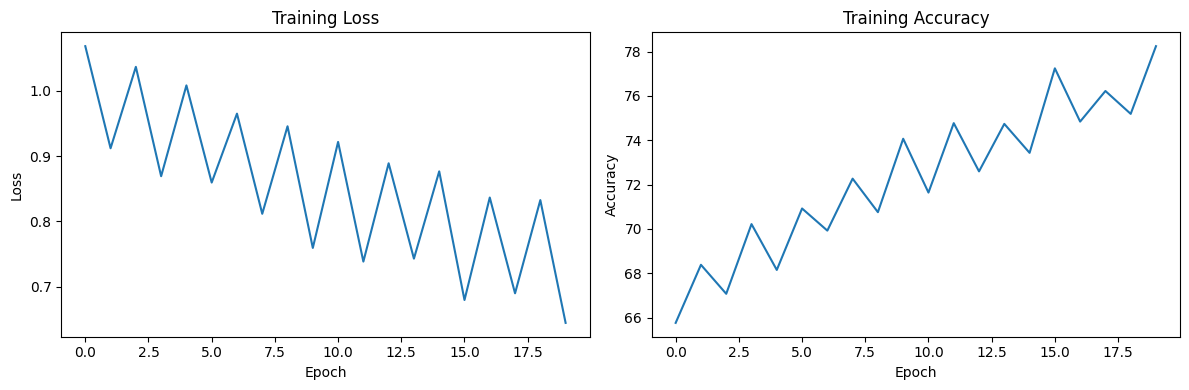

In [49]:
# grafici
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_acc)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()